In [3]:
import matplotlib.pyplot as plt 
import numpy as np

# White noise
A stochastic process/ time series  $X(t)$is called a white nose 
if it's spetral density  (or say Fourier transformation of correction function ) is uniform . It can be shown that the corresponding correlation function is

$
\langle X(t)X(t') \rangle = A \delta(t-t')
$  for some constant $A$ .

For example a $\textbf{Gaussian white noise} $ (stationary Gaussian process) . The following is the simmulation of Gaussian white noise .

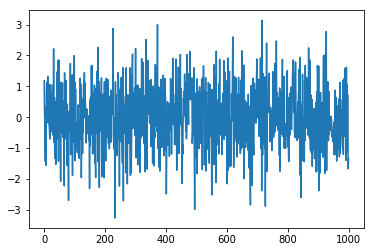

In [10]:
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

plt.plot(samples)

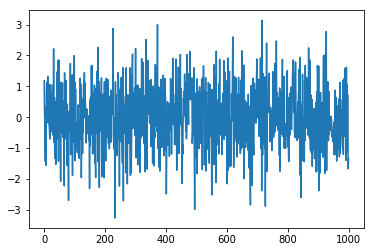

In [16]:
def white_noise(n,mean,std):
    sample = np.random.normal(mean,std,size=n)
    plt.plot(samples)
white_noise(1000,0,0.33)

# Brownian motion
Brownian motion is 